In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
df = pd.read_csv("../data/final/1919.csv")
df

,year,state,april-avg-temp,may-avg-temp,june-avg-temp,july-avg-temp,august-avg-temp,september-avg-temp,october-avg-temp,november-avg-temp,...,november-pdsi-lagged,price-received-lagged,silage-yield-lagged,grain-yield-lagged,april-nov-avg-temp,april-nov-precipitation,april-nov-pdsi,april-nov-avg-temp-lagged,april-nov-precipitation-lagged,april-nov-pdsi-lagged
0,1919,illinois,52.1,58.9,74.2,78.0,72.6,68.8,56.8,38.4,...,-2.88,0.580,6.8,35.0,62.5,30.83,0.225714,61.1,22.70,-1.155714
1,1919,indiana,50.8,58.5,74.4,77.0,71.6,68.2,58.7,40.0,...,-1.57,0.570,7.4,39.5,62.4,30.04,-0.245714,60.4,26.20,-0.631429
2,1919,iowa,47.6,57.4,71.3,76.8,70.6,66.4,49.5,32.0,...,-0.59,0.470,8.7,46.0,59.0,30.96,1.542857,58.2,25.98,-0.518571
3,1919,minnesota,41.6,54.7,66.6,70.3,65.5,58.6,37.9,20.3,...,-1.33,0.470,7.8,33.5,51.9,24.19,1.508571,52.8,21.46,0.488571
4,1919,missouri,54.6,61.6,74.5,78.9,75.3,70.6,58.0,41.5,...,-0.58,0.425,5.6,31.5,64.4,35.10,0.821429,63.0,28.13,0.277143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2024,indiana,54.8,66.6,72.8,73.2,73.1,67.3,51.1,40.8,...,0.32,4.950,17.0,196.0,60.7,20.74,-0.997143,60.7,20.74,-0.997143
632,2024,iowa,50.8,62.1,72.0,72.2,71.2,67.3,51.1,40.8,...,0.32,4.950,17.0,196.0,60.7,20.74,-0.997143,60.7,20.74,-0.997143
633,2024,minnesota,44.4,56.4,64.5,69.8,67.2,67.3,51.1,40.8,...,0.32,4.950,17.0,196.0,60.7,20.74,-0.997143,60.7,20.74,-0.997143
634,2024,missouri,58.6,67.9,75.8,76.1,75.7,67.3,51.1,40.8,...,0.32,4.950,17.0,196.0,60.7,20.74,-0.997143,60.7,20.74,-0.997143


In [8]:
corr = df.corr(numeric_only=True)
corr

,year,april-avg-temp,may-avg-temp,june-avg-temp,july-avg-temp,august-avg-temp,september-avg-temp,october-avg-temp,november-avg-temp,april-precipitation,...,november-pdsi-lagged,price-received-lagged,silage-yield-lagged,grain-yield-lagged,april-nov-avg-temp,april-nov-precipitation,april-nov-pdsi,april-nov-avg-temp-lagged,april-nov-precipitation-lagged,april-nov-pdsi-lagged
year,1.000000,0.072445,0.092142,0.087325,-0.063116,-0.007552,0.045536,-0.038982,0.146989,0.113572,...,0.201996,0.840997,0.858434,0.944674,0.057970,0.159737,0.240554,0.059419,0.150104,0.234969
april-avg-temp,0.072445,1.000000,0.587239,0.629210,0.630467,0.565567,0.654677,0.546063,0.707679,0.323761,...,-0.037294,0.077659,0.049661,0.048480,0.833864,0.387446,-0.069457,0.764172,0.375524,-0.058741
may-avg-temp,0.092142,0.587239,1.000000,0.592417,0.557844,0.549586,0.561703,0.508360,0.572495,0.259352,...,-0.041640,0.064973,0.064688,0.059573,0.755714,0.319346,-0.144035,0.637332,0.354385,-0.001917
june-avg-temp,0.087325,0.629210,0.592417,1.000000,0.641708,0.591322,0.696282,0.559831,0.650505,0.295936,...,-0.089499,0.141779,0.057411,0.073674,0.816645,0.234393,-0.228056,0.700871,0.322805,-0.113170
july-avg-temp,-0.063116,0.630467,0.557844,0.641708,1.000000,0.700600,0.598555,0.454313,0.578687,0.206676,...,-0.226880,0.009466,-0.149274,-0.109483,0.777244,0.144873,-0.252608,0.688797,0.149202,-0.239901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
april-nov-precipitation,0.159737,0.387446,0.319346,0.234393,0.144873,0.223477,0.330030,0.381552,0.398737,0.547334,...,0.169479,0.156361,0.219402,0.156833,0.395167,1.000000,0.581901,0.440539,0.525517,0.287558
april-nov-pdsi,0.240554,-0.069457,-0.144035,-0.228056,-0.252608,-0.147310,-0.120321,-0.031715,-0.007018,0.219508,...,0.261387,0.238597,0.266038,0.233226,-0.136362,0.581901,1.000000,-0.014691,0.100038,0.436778
april-nov-avg-temp-lagged,0.059419,0.764172,0.637332,0.700871,0.688797,0.701753,0.776846,0.697045,0.750116,0.391095,...,-0.111573,0.095240,0.013393,0.020111,0.890050,0.440539,-0.014691,1.000000,0.389660,-0.135443
april-nov-precipitation-lagged,0.150104,0.375524,0.354385,0.322805,0.149202,0.234572,0.362554,0.389984,0.363078,0.344332,...,0.613949,0.090183,0.258296,0.172874,0.410385,0.525517,0.100038,0.389660,1.000000,0.586732


<Axes: >

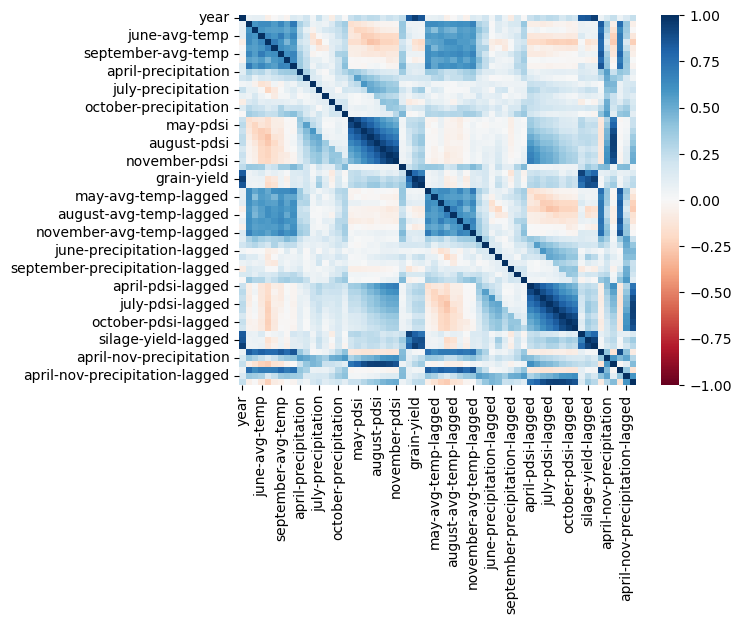

In [9]:
sns.heatmap(corr, cmap="RdBu", vmin=-1, vmax=1)

In [10]:
ts = df[df["state"] == "illinois"]

In [11]:
def make_power_spectrum(x, y):
    K = 5
    N = len(ts)
    N_seg = 2*(N//(2*K))
    dx = x[1] - x[0]

    k, p = scipy.signal.welch(y, fs=1/dx, nperseg=N_seg, window='cosine', scaling='spectrum')

    fig = plt.figure()
    ax = fig.add_axes(111)

    ax.loglog(k, p, 'k-')
    ax.set_xlabel("frequency (1/yr)")
    ax.set_ylabel("power")
    ax.set_title("Power Spectrum")

    return fig, ax

NameError: name 'k' is not defined

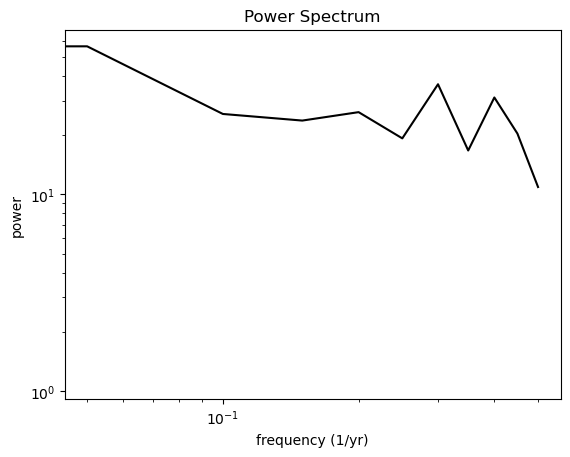

In [12]:
date = ts["year"].to_numpy()
grain = ts["grain-yield"].to_numpy()

grain_fig, grain_ax = make_power_spectrum(date, grain)
grain_ax.axvline(k[6], label="period=2 months", c="red")
grain_ax.axvline(k[8], label="period=1.5 months", c="blue")
grain_ax.legend()

NameError: name 'k' is not defined

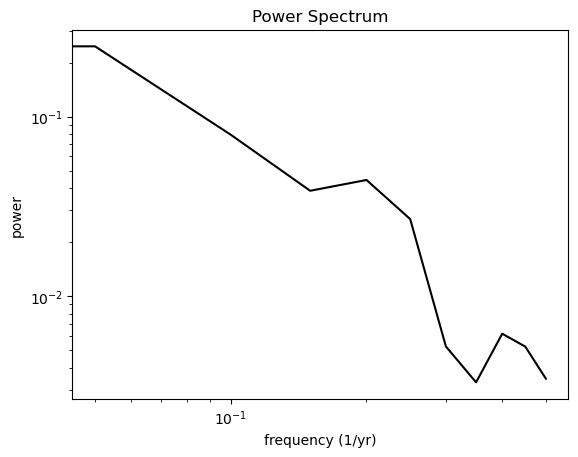

In [ ]:
date = ts["year"].to_numpy()
grain = ts["price-received"].to_numpy()

price_fig, price_ax = make_power_spectrum(date, grain)
price_ax.axvline(k[4], label="period=3 months", c="red")
price_ax.axvline(k[8], label="period=1.5 months", c="blue")
price_ax.legend()

In [13]:
df = pd.read_csv("../data/final/1995.csv")
df

,year,state,april-avg-temp,may-avg-temp,june-avg-temp,july-avg-temp,august-avg-temp,september-avg-temp,october-avg-temp,november-avg-temp,...,april-nov-avg-temp,april-nov-precipitation,april-nov-pdsi,april-nov-subsoil-score,april-nov-topsoil-score,april-nov-avg-temp-lagged,april-nov-precipitation-lagged,april-nov-pdsi-lagged,april-nov-subsoil-score-lagged,april-nov-topsoil-score-lagged
0,1919,illinois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1919,indiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1919,iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1919,minnesota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1919,missouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2024,indiana,54.8,66.6,72.8,73.2,73.1,67.3,51.1,40.8,...,60.7,20.74,-0.997143,266.492857,221.642857,60.7,20.74,-0.997143,251.192857,221.642857
632,2024,iowa,50.8,62.1,72.0,72.2,71.2,67.3,51.1,40.8,...,60.7,20.74,-0.997143,267.085714,221.642857,60.7,20.74,-0.997143,251.192857,221.642857
633,2024,minnesota,44.4,56.4,64.5,69.8,67.2,67.3,51.1,40.8,...,60.7,20.74,-0.997143,293.635714,221.642857,60.7,20.74,-0.997143,251.192857,221.642857
634,2024,missouri,58.6,67.9,75.8,76.1,75.7,67.3,51.1,40.8,...,60.7,20.74,-0.997143,280.735714,221.642857,60.7,20.74,-0.997143,251.192857,221.642857


<Axes: >

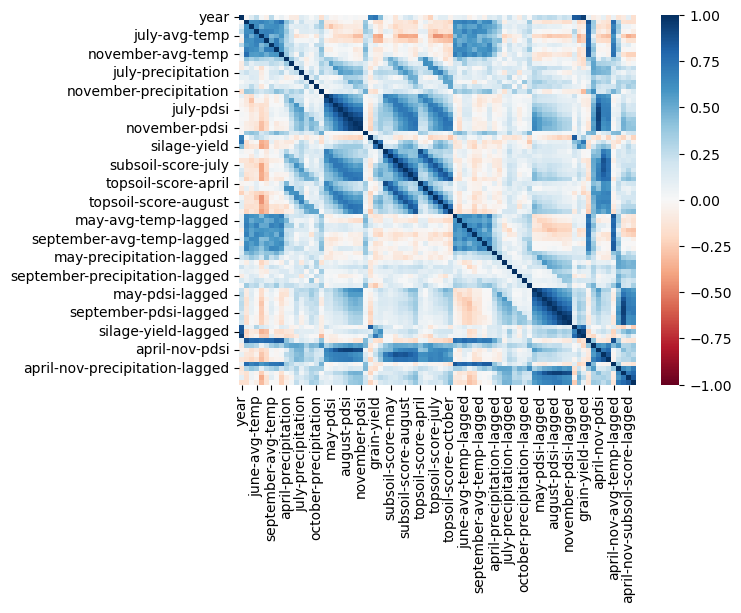

In [14]:
sns.heatmap(df.corr(numeric_only=True), cmap="RdBu", vmin=-1, vmax=1)

In [15]:
df

,year,state,april-avg-temp,may-avg-temp,june-avg-temp,july-avg-temp,august-avg-temp,september-avg-temp,october-avg-temp,november-avg-temp,...,april-nov-avg-temp,april-nov-precipitation,april-nov-pdsi,april-nov-subsoil-score,april-nov-topsoil-score,april-nov-avg-temp-lagged,april-nov-precipitation-lagged,april-nov-pdsi-lagged,april-nov-subsoil-score-lagged,april-nov-topsoil-score-lagged
0,1919,illinois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1919,indiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1919,iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1919,minnesota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1919,missouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2024,indiana,54.8,66.6,72.8,73.2,73.1,67.3,51.1,40.8,...,60.7,20.74,-0.997143,266.492857,221.642857,60.7,20.74,-0.997143,251.192857,221.642857
632,2024,iowa,50.8,62.1,72.0,72.2,71.2,67.3,51.1,40.8,...,60.7,20.74,-0.997143,267.085714,221.642857,60.7,20.74,-0.997143,251.192857,221.642857
633,2024,minnesota,44.4,56.4,64.5,69.8,67.2,67.3,51.1,40.8,...,60.7,20.74,-0.997143,293.635714,221.642857,60.7,20.74,-0.997143,251.192857,221.642857
634,2024,missouri,58.6,67.9,75.8,76.1,75.7,67.3,51.1,40.8,...,60.7,20.74,-0.997143,280.735714,221.642857,60.7,20.74,-0.997143,251.192857,221.642857


In [16]:
df.columns

Index(['year', 'state', 'april-avg-temp', 'may-avg-temp', 'june-avg-temp',
       'july-avg-temp', 'august-avg-temp', 'september-avg-temp',
       'october-avg-temp', 'november-avg-temp', 'april-precipitation',
       'may-precipitation', 'june-precipitation', 'july-precipitation',
       'august-precipitation', 'september-precipitation',
       'october-precipitation', 'november-precipitation', 'april-pdsi',
       'may-pdsi', 'june-pdsi', 'july-pdsi', 'august-pdsi', 'september-pdsi',
       'october-pdsi', 'november-pdsi', 'population-density', 'price-received',
       'grain-yield', 'silage-yield', 'subsoil-score-april',
       'subsoil-score-may', 'subsoil-score-june', 'subsoil-score-july',
       'subsoil-score-august', 'subsoil-score-september',
       'subsoil-score-october', 'topsoil-score-april', 'topsoil-score-may',
       'topsoil-score-june', 'topsoil-score-july', 'topsoil-score-august',
       'topsoil-score-september', 'topsoil-score-october',
       'april-avg-temp-lagge

Text(0, 0.5, 'Grain Yield (bu/acre)')

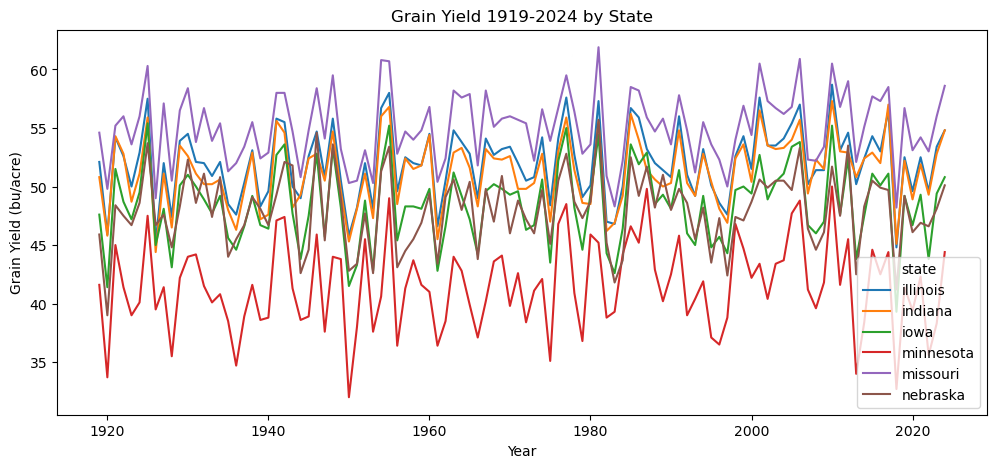

In [21]:
df_1919 = pd.read_csv("../data/final/1919.csv")

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.lineplot(x='year', y='april-avg-temp', hue='state', data=df_1919)
plt.title("Grain Yield 1919-2024 by State")
plt.xlabel("Year")
plt.ylabel("Grain Yield (bu/acre)")
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles, [x.capitalize() for x in labels])

# sns.lineplot(x='year', y='silage-yield', hue='state', data=df_1919, ax=ax[1])
# ax[1].set_title("Silage Yield 1919-2024 by State")
# ax[1].set_xlabel("Year")
# ax[1].set_ylabel("Silage Yield (tons/acre)")
# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles, [x.capitalize() for x in labels])

In [ ]:
df_1919 = pd.read_csv("../data/final/1919.csv")

fig, ax = plt.subplots(1, 1, figsize=(12,5))

sns.lineplot(x='year', y='grain-yield', hue='state', data=df_1919)
plt.title("Grain Yield 1919-2024 by State")
plt.xlabel("Year")
plt.ylabel("Grain Yield (bu/acre)")

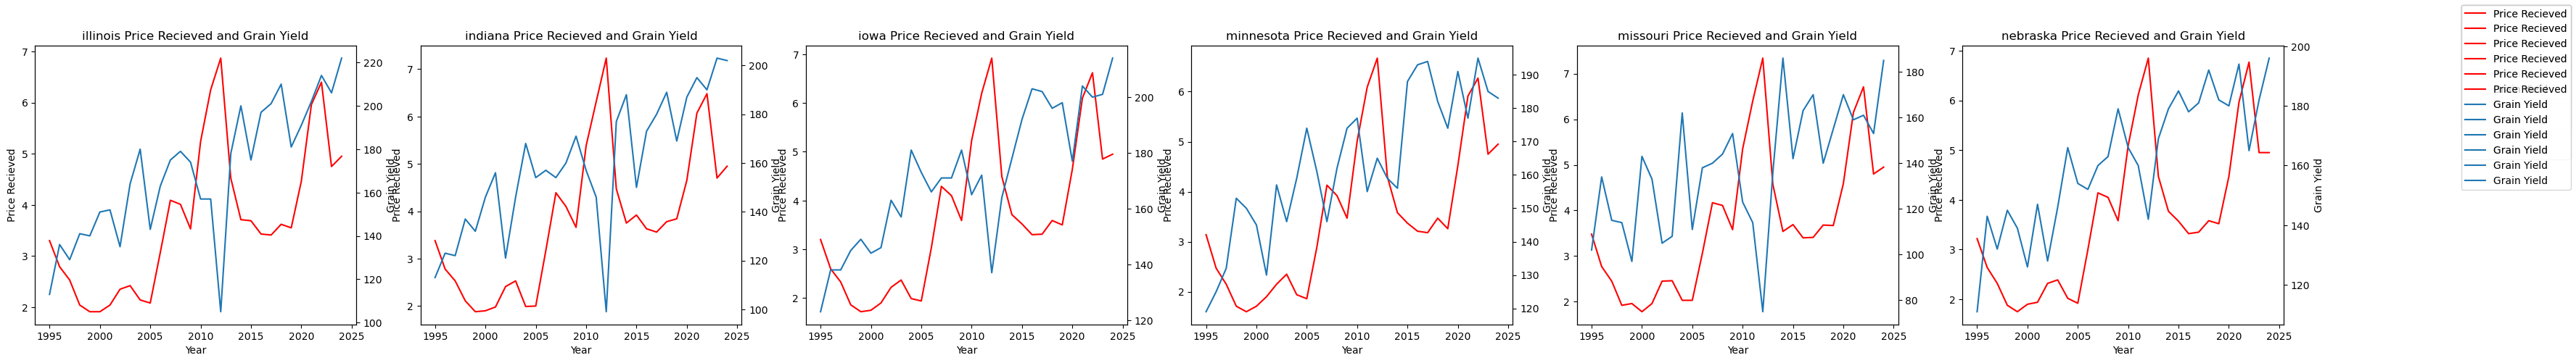

In [ ]:
fig, ax1 = plt.subplots(1,6, figsize=(40,5))
states = ["illinois", "indiana", "iowa", "minnesota", "missouri", "nebraska"]

for i, state in enumerate(states):
    ax2 = ax1[i].twinx()

    df2 = df[df['state'] == state]

    ax1[i].plot(df2['year'], df2['price-received'], color='red', label="Price Recieved")
    ax2.plot(df2['year'], df2['grain-yield'], label="Grain Yield")
    fig.legend()
    ax1[i].set_title(f"{state} Price Recieved and Grain Yield")
    ax1[i].set_xlabel("Year")
    ax1[i].set_ylabel("Price Recieved")
    ax2.set_ylabel("Grain Yield")


In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("../data/final/1919.csv")
df[["year", "state", "april-avg-temp", "april-precipitation", "april-pdsi", "price-received", "silage-yield", "grain-yield", "april-avg-temp-lagged"]].tail(6)

,year,state,april-avg-temp,april-precipitation,april-pdsi,price-received,silage-yield,grain-yield,april-avg-temp-lagged
630,2024,illinois,54.8,5.98,0.77,4.95,17.0,222.0,50.1
631,2024,indiana,54.8,6.67,-1.21,4.95,17.0,202.0,50.1
632,2024,iowa,50.8,4.22,0.52,4.95,17.0,214.0,50.1
633,2024,minnesota,44.4,3.23,0.52,4.95,17.0,183.0,50.1
634,2024,missouri,58.6,5.69,0.56,4.95,17.0,185.0,50.1
635,2024,nebraska,50.1,3.17,0.33,4.95,17.0,196.0,50.1
